<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/manczak/07_05_Nienadzorowane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pobierz dane o krajach

In [1]:
import pandas as pd

# Load the data from the CSV file
data_path = 'countries.csv'
countries_data = pd.read_csv(data_path)

# Display the first few rows of the dataset and its columns
countries_data.head(), countries_data.columns

(           Country                               Region  Population  \
 0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
 1         Albania   EASTERN EUROPE                          3581655   
 2         Algeria   NORTHERN AFRICA                        32930091   
 3  American Samoa   OCEANIA                                   57794   
 4         Andorra   WESTERN EUROPE                            71201   
 
    Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
 0          647500                       48,0                         0,00   
 1           28748                      124,6                         1,26   
 2         2381740                       13,8                         0,04   
 3             199                      290,4                        58,29   
 4             468                      152,1                         0,00   
 
   Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
 0         23,06     

#Przeprowadź analizę skupień
Sposobem K-means, ale k = 3

Przygotowanie danych i wybór cech

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Wybierz interesujące Cię kolumny numeryczne
features = ['Population', 'Area (sq. mi.)', 'GDP ($ per capita)', 'Literacy (%)', 'Birthrate', 'Deathrate']

# Zamień przecinki na kropki i konwertuj kolumny na numeryczne
countries_data[features] = countries_data[features].replace(',', '.', regex=True).apply(pd.to_numeric, errors='coerce')

# Uzupełnij brakujące wartości średnią dla każdej kolumny
imputer = SimpleImputer(strategy='mean')
countries_data[features] = imputer.fit_transform(countries_data[features])

# Skaluj cechy, aby miały podobną wagę w analizie
scaler = StandardScaler()
countries_scaled = scaler.fit_transform(countries_data[features])



In [11]:
countries_scaled

array([[ 0.01969468,  0.02758332, -0.89855358, -2.48100371,  2.21029964,
         2.2490751 ],
       [-0.21387688, -0.31879748, -0.5187348 ,  0.19395989, -0.63232132,
        -0.81490125],
       [ 0.03561811,  0.99842051, -0.36880633, -0.68003812, -0.44907202,
        -0.93851405],
       ...,
       [-0.06192308, -0.03933023, -0.88855835, -1.72883573,  1.87539574,
        -0.19075792],
       [-0.14654488,  0.08642673, -0.88855835, -0.11856061,  1.70478432,
         2.16599109],
       [-0.14029829, -0.11624192, -0.77861081,  0.41643211,  0.53216932,
         2.55304101]])

Przeprowadzenie analizy

In [17]:
from sklearn.cluster import KMeans

# Stosuj K-means z k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(countries_scaled)

# Przypisz etykiety do danych
countries_data['Cluster'] = kmeans.labels_

# Wyświetl dane z przypisanymi klastrami
print(countries_data[['Country', 'Cluster']])




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


            Country  Cluster
0       Afghanistan        0
1           Albania        2
2           Algeria        2
3    American Samoa        2
4           Andorra        1
..              ...      ...
222       West Bank        2
223  Western Sahara        2
224           Yemen        0
225          Zambia        0
226        Zimbabwe        0

[227 rows x 2 columns]


In [4]:
# Wyświetl centroidy dla klastrów
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print(centroids)


     Population  Area (sq. mi.)  GDP ($ per capita)  Literacy (%)  Birthrate  \
0  1.379403e+07    2.613446e+05        12332.011465     91.838055  16.998110   
1  4.417292e+08    9.396379e+06        17285.714286     90.057143  14.118571   
2  2.030637e+07    4.667061e+05         1931.147541     58.551447  36.369094   

   Deathrate  
0   7.266503  
1   8.505714  
2  14.473301  


Sprawdzam ile państw należy do klastra

In [6]:
# Obliczanie liczby krajów w każdym klastrze
cluster_counts = countries_data['Cluster'].value_counts()

# Wyświetlanie wyników
print(cluster_counts)


Cluster
0    159
2     61
1      7
Name: count, dtype: int64


In [19]:
# Zapisywanie DataFrame do pliku CSV
countries_data[['Country', 'Cluster']].to_csv('countries_clusters.csv', index=False)


Sprawdzamy sugerowaną liczbę klastrów:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

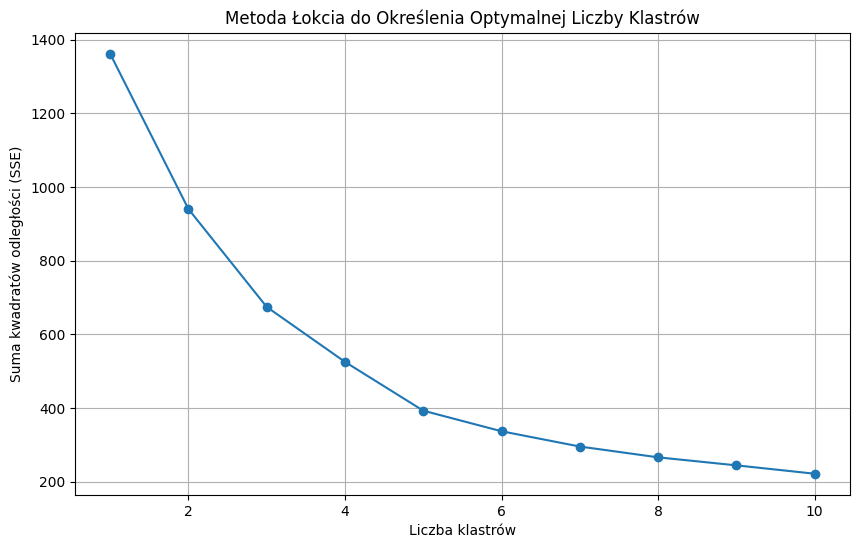

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Obliczanie SSE dla różnych liczby klastrów
sse = []
for k in range(1, 11):  # Sprawdzamy od 1 do 10 klastrów
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(countries_scaled)
    sse.append(kmeans.inertia_)  # Dodajemy SSE do listy

# Rysowanie wykresu metody łokcia
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Metoda Łokcia do Określenia Optymalnej Liczby Klastrów')
plt.xlabel('Liczba klastrów')
plt.ylabel('Suma kwadratów odległości (SSE)')
plt.grid(True)
plt.show()


#Budowanie dendrogramu

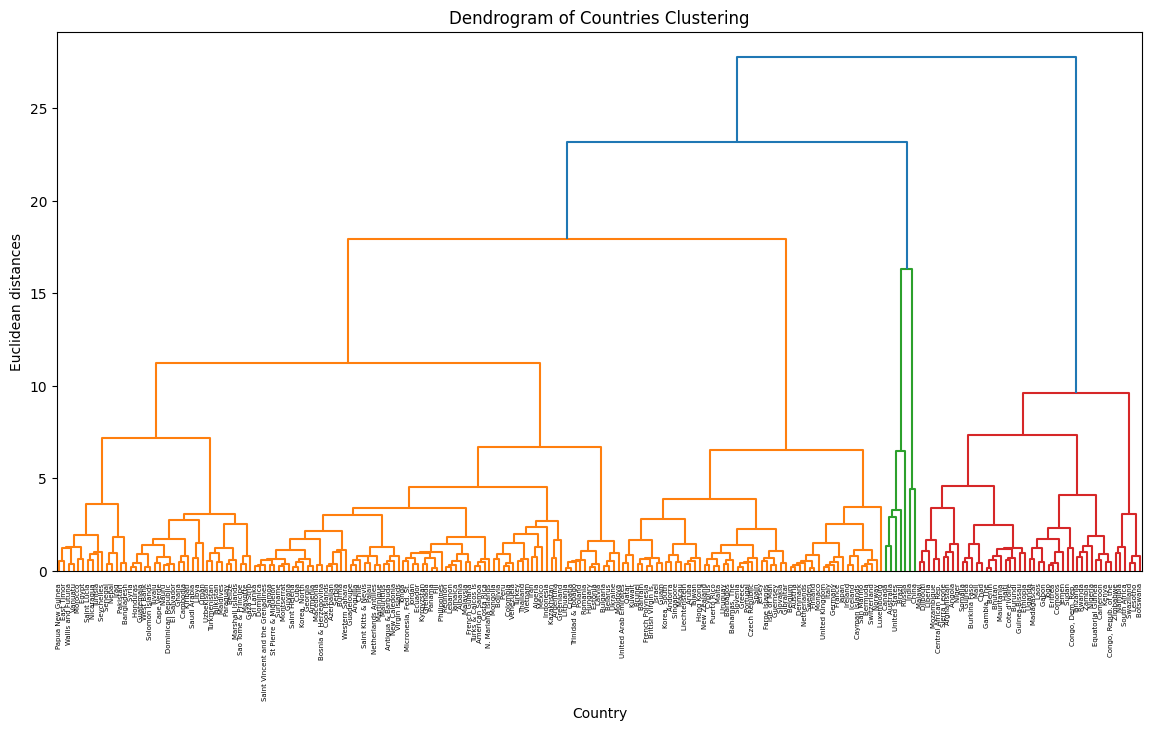

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix using the Ward variance minimization algorithm
linked = linkage(countries_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(14, 7))
dendrogram(linked,
           orientation='top',
           labels=countries_data['Country'].values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram of Countries Clustering')
plt.xlabel('Country')
plt.ylabel('Euclidean distances')
plt.show()


Próbujemy ten Siluet

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

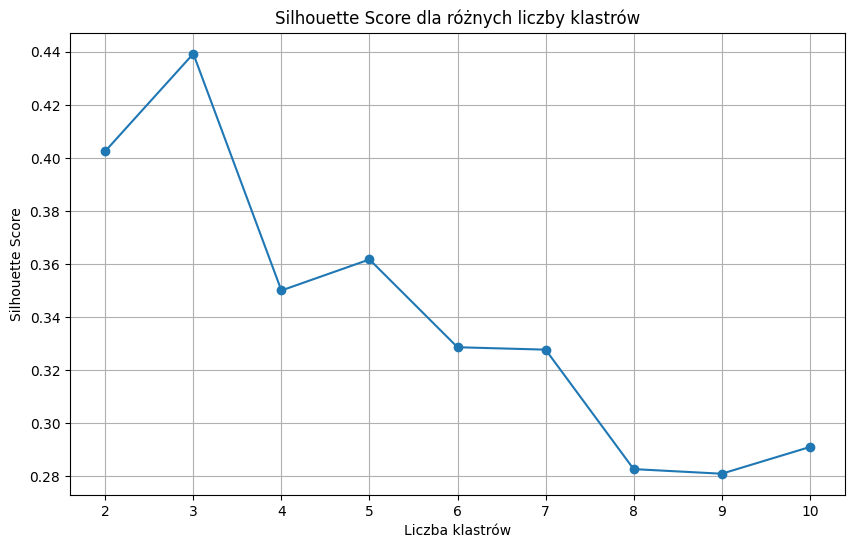

In [9]:
from sklearn.metrics import silhouette_score

# Obliczanie silhouette scores dla różnych liczby klastrów
silhouette_scores = []
ks = range(2, 11)  # silhouette score nie jest definiowane dla k=1
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(countries_scaled)
    score = silhouette_score(countries_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Rysowanie wykresu silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(ks, silhouette_scores, marker='o')
plt.title('Silhouette Score dla różnych liczby klastrów')
plt.xlabel('Liczba klastrów')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


#Próba 2

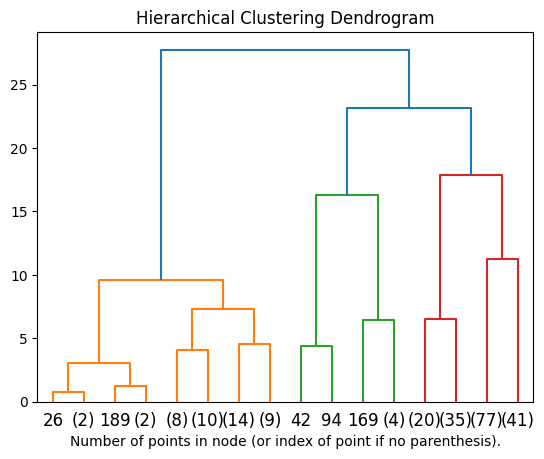

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Przygotowanie danych (załóżmy, że już załadowane i przetworzone jak w poprzednich przykładach)
features = ['Population', 'Area (sq. mi.)', 'GDP ($ per capita)', 'Literacy (%)', 'Birthrate', 'Deathrate']
countries_data[features] = countries_data[features].replace(',', '.', regex=True).apply(pd.to_numeric, errors='coerce')
scaler = StandardScaler()
countries_scaled = scaler.fit_transform(countries_data[features])

# Definiowanie funkcji do rysowania dendrogramu
def plot_dendrogram(model, **kwargs):
    # Tworzenie macierzy połączeń do dendrogramu
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

# Konfiguracja i dopasowanie modelu aglomeracyjnego
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(countries_scaled)

# Rysowanie dendrogramu
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


# Podejscie 3

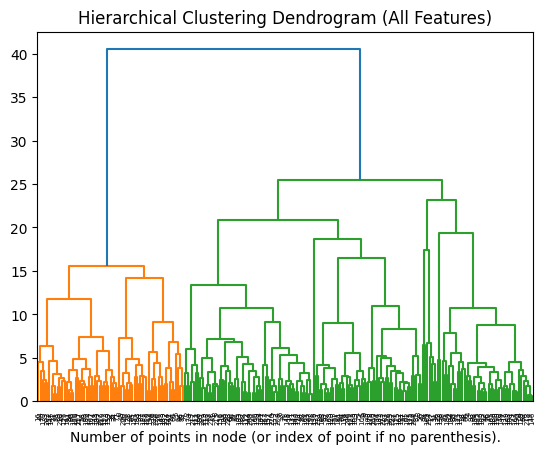

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Załaduj dane
data_path = 'countries.csv'
countries_data = pd.read_csv(data_path)

# Przetwarzanie danych
# Zamień wszystkie przecinki na kropki i konwertuj na liczby, gdzie to możliwe
countries_data = countries_data.replace(',', '.', regex=True)
for column in countries_data.columns:
    countries_data[column] = pd.to_numeric(countries_data[column], errors='ignore')

# Uzupełnij brakujące dane
imputer = SimpleImputer(strategy='mean')
countries_data_numeric = countries_data.select_dtypes(include=[np.number])  # tylko kolumny numeryczne
countries_data_numeric = imputer.fit_transform(countries_data_numeric)

# Normalizacja danych
scaler = StandardScaler()
countries_scaled = scaler.fit_transform(countries_data_numeric)

# Ustawienie modelu AgglomerativeClustering i tworzenie dendrogramu (funkcja plot_dendrogram bez zmian)
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model.fit(countries_scaled)

# Rysowanie dendrogramu
plt.title("Hierarchical Clustering Dendrogram (All Features)")
plot_dendrogram(model, truncate_mode='level')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


Podaj liczbę klastrów4


<ipython-input-29-ebedb9d05b70>:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


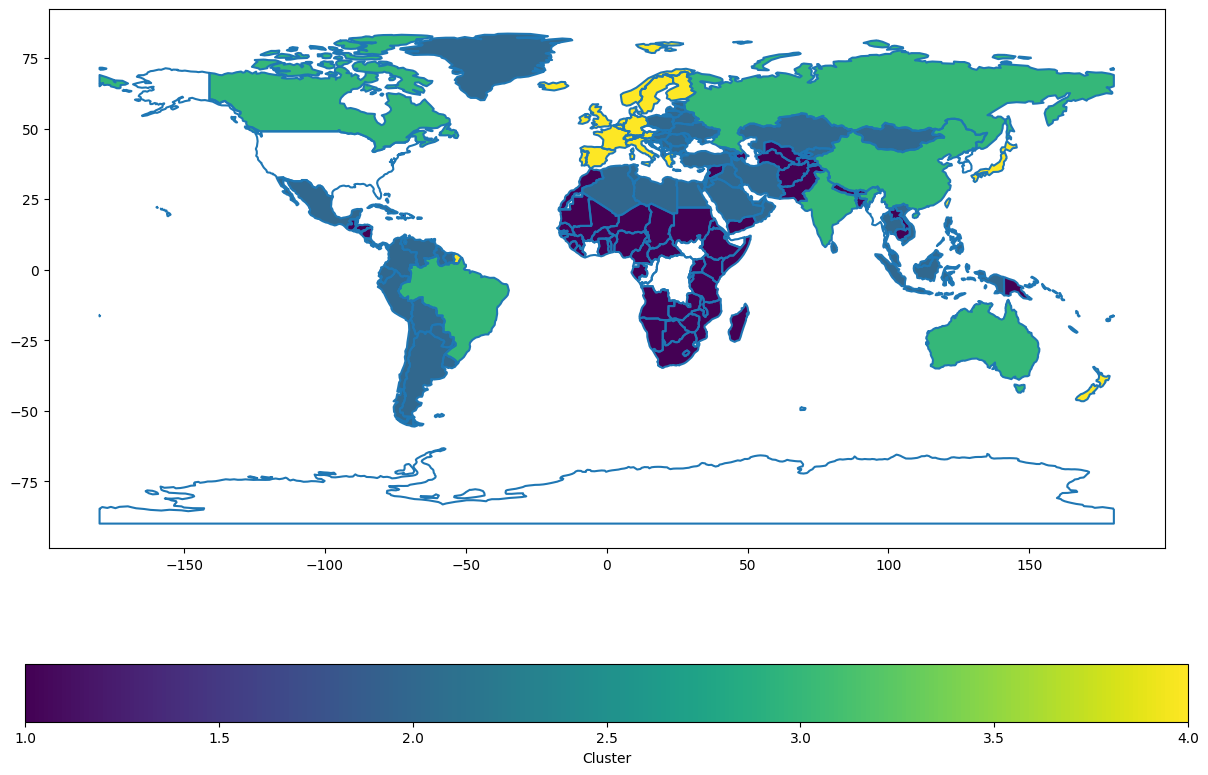

In [29]:
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

# Konwertujemy 'model.children_' na pełną macierz połączeń (linkage matrix)
# Możemy to zrobić, obliczając odległości ponownie
distance = pdist(countries_scaled)
linkage_matrix = linkage(distance, method='ward')

# Możemy zdecydować się na określoną liczbę klastrów, na przykład 4 (sugerowane na zajęciach)
how_many_clusters = input("Podaj liczbę klastrów")
cluster_labels = fcluster(linkage_matrix, t=how_many_clusters, criterion='maxclust')

# Dodajemy etykiety klastrów do DataFrame
countries_data['Cluster'] = cluster_labels

import geopandas as gpd
import matplotlib.pyplot as plt

# Wczytanie mapy świata
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Przygotowanie danych klastrów, upewnij się, że nazwy krajów są odpowiednio sformatowane
countries_data['Country'] = countries_data['Country'].str.strip()

# Połączenie danych geograficznych z danymi klastrów
world = world.merge(countries_data[['Country', 'Cluster']], left_on='name', right_on='Country', how='left')

# Rysowanie mapy
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Cluster', ax=ax, legend=True,
           legend_kwds={'label': "Cluster", 'orientation': "horizontal"})
plt.show()
